In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
fb= pd.read_csv("FB-stock.csv", index_col = 'Date', parse_dates = True)

In [113]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600
2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300


In [114]:
fb.shape

(1007, 6)

In [115]:
fb.index= pd.to_datetime(fb.index)
print(fb.index.dtype)
print(fb.head())

datetime64[ns]
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-12-31  79.540001  79.800003  77.860001  78.019997  78.019997  19935400
2015-01-02  78.580002  78.930000  77.699997  78.449997  78.449997  18177500
2015-01-05  77.980003  79.250000  76.860001  77.190002  77.190002  26452200
2015-01-06  77.230003  77.589996  75.360001  76.150002  76.150002  27399300
2015-01-07  76.760002  77.360001  75.820000  76.150002  76.150002  22045300


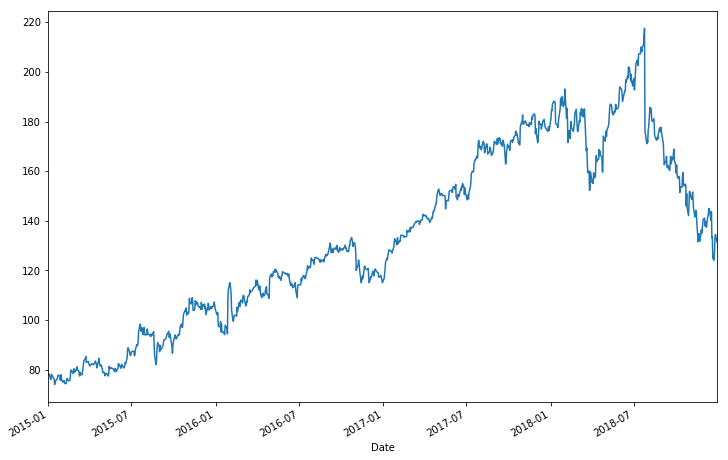

-1.667876857805789 0.44773461858453373


In [135]:
#Identification
from statsmodels.tsa.stattools import adfuller
fb['Close'].plot(figsize = (12,8))
plt.show()
result= adfuller(fb['Close'])
print(result[0], result[1])

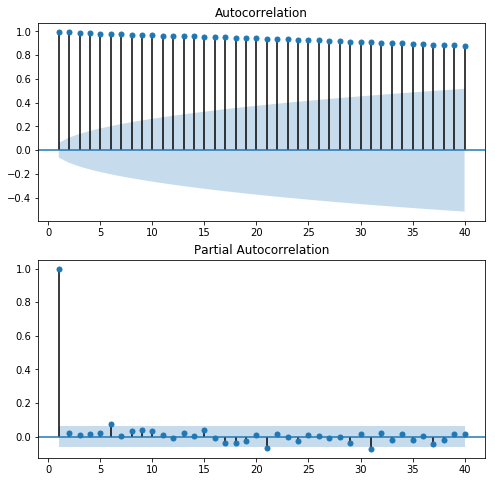

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,8))
plot_acf(fb['Close'], lags= 40, zero= False, ax = ax1)
plot_pacf(fb['Close'], lags = 40, zero = False, ax = ax2)
plt.show()

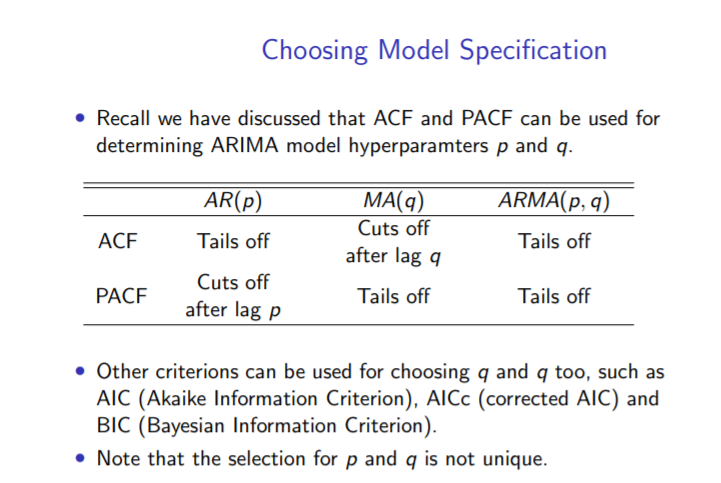

In [118]:
adf= adfuller(fb['Close'])
print('ADF Statistics:', adf[0])
print('P-value', adf[1])

ADF Statistics: -1.667876857805789
P-value 0.44773461858453373


In [119]:
adf= adfuller(fb['Close'].diff().dropna())
print('ADF Statistics:', adf[0])
print('P-value:', adf[1])

ADF Statistics: -32.24232787815293
P-value: 0.0


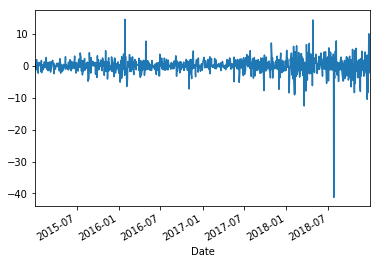

In [120]:
fbdiff = fb['Close'].diff().dropna()
fbdiff.plot()

In [122]:
#Estimation
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(4):
    for q in range(4): 
        model = SARIMAX(fbdiff, order = (p,0,q), trend = 'c', enforce_stationarity=False, enforce_invertibility=False)
        results= model.fit()
        order_aic_bic.append((p,q,results.aic, results.bic))
        
order_df = pd.DataFrame(order_aic_bic, columns = ['p', 'q', 'aic', 'bic'])
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated

    p  q          aic          bic
7   1  3  4765.042692  4794.501212
11  2  3  4767.167897  4801.536170
6   1  2  4767.739345  4792.293099
15  3  3  4768.508794  4807.786820
13  3  1  4768.812983  4798.277487
3   0  3  4768.871455  4793.420221
10  2  2  4769.308494  4798.772998
5   1  1  4770.544947  4790.191936
14  3  2  4770.843473  4805.218729
9   2  1  4771.545230  4796.103966
2   0  2  4771.595992  4791.238995
12  3  0  4772.950536  4797.504290
1   0  1  4774.173946  4788.909187
8   2  0  4775.609884  4795.256873
0   0  0  4776.534301  4786.359787
4   1  0  4778.200215  4792.938443
    p  q          aic          bic
0   0  0  4776.534301  4786.359787
1   0  1  4774.173946  4788.909187
5   1  1  4770.544947  4790.191936
2   0  2  4771.595992  4791.238995
6   1  2  4767.739345  4792.293099
4   1  0  4778.200215  4792.938443
3   0  3  4768.871455  4793.420221
7   1  3  4765.042692  4794.501212
8   2  0  4775.609884  4795.256873
9   2  1  4771.545230  4796.103966
12  3  0  4772.95053

C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated

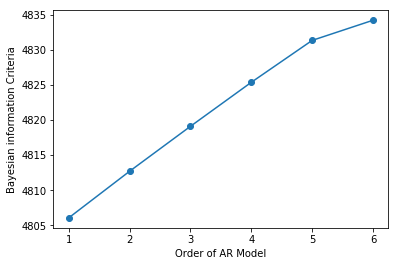

In [123]:
#Checking estimation graphically:
#Plotting BIC vs  AR
from statsmodels.tsa.arima_model import ARMA
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(fb['Close'], order = (p,0))
    res =  mod.fit()
    BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian information Criteria')
plt.show()

C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated

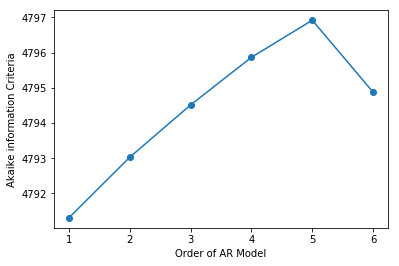

In [124]:
from statsmodels.tsa.arima_model import ARMA
AIC = np.zeros(7)
for p in range(7):
    mod = ARMA(fb['Close'], order = (p,0))
    res = mod.fit()
    AIC[p] = res.aic
    
plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akaike information Criteria')
plt.show()

In [126]:
#Fitting model
model = SARIMAX(fb['Close'], order = (1,1,3), trend = 'c')
results = model.fit()

C:\Users\Ayesha Fatima\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [129]:
#Making one step ahead prediction
forecast = results.get_prediction(start = -30)
#Mean forecast
mean_forecast = forecast.predicted_mean
#Get the confidence interval of the forecaste
confidence_intervals = forecast.conf_int()
#Printing confidence intervals
print(confidence_intervals.head())


            lower Close  upper Close
Date                                
2018-11-15   139.559764   149.701113
2018-11-16   139.100618   149.241968
2018-11-19   134.811896   144.953246
2018-11-20   127.073203   137.214552
2018-11-21   128.049126   138.190476


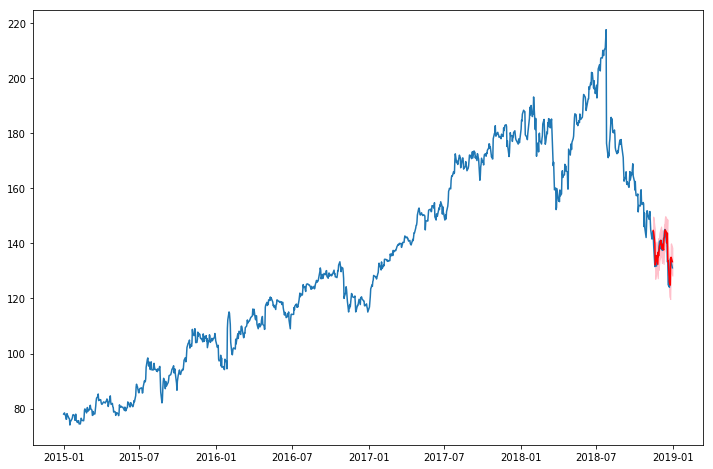

In [134]:
#Plotting predictions
plt.figure(figsize = (12,8))
plt.plot(fb.index,fb['Close'], label = 'observed')
#Plotting mean_forecast
plt.plot(mean_forecast.index, mean_forecast.values, color = 'red', label = 'Forecast')
#Determining limits
low_limit = confidence_intervals.loc[:,'lower Close']
upp_limit = confidence_intervals.loc[:,'upper Close']
#Shading uncertainty area
plt.fill_between(low_limit.index, low_limit, upp_limit, color = 'pink')

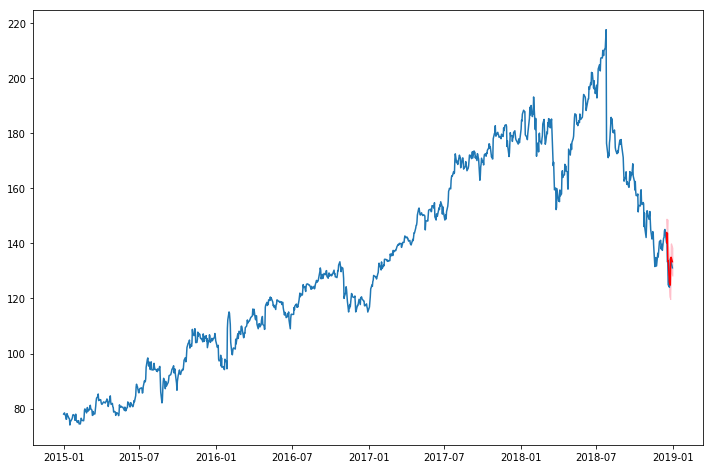

In [152]:
#Forecasting out of sample
dforecast = results.get_prediction(start = -10)
dmean_forecast= dforecast.predicted_mean
dconfidence_intervals = dforecast.conf_int()
#Plotting figure
plt.figure(figsize = (12,8))
plt.plot(fb.index,fb['Close'], label = 'observed')
#Plotting mean_forecast
plt.plot(dmean_forecast.index, dmean_forecast.values, color = 'red', label = 'Forecast')
#Determining limits
dlow_limit = dconfidence_intervals.loc[:,'lower Close']
dupp_limit = dconfidence_intervals.loc[:,'upper Close']
#Shading uncertainty area
plt.fill_between(dlow_limit.index, dlow_limit, dupp_limit, color = 'pink')

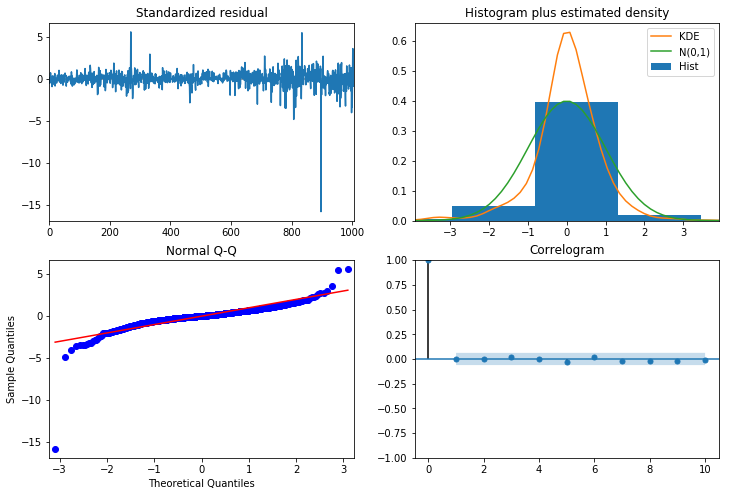

In [162]:
#Model diagnostics
residual = results.resid
#Mean abs error
mae = np.mean(np.abs(residual))
#Plot diagnostics
results.plot_diagnostics(figsize = (12,8))
plt.show()



In [163]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 1007
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2383.726
Date:                Mon, 07 Oct 2019   AIC                           4779.453
Time:                        00:50:51   BIC                           4808.935
Sample:                             0   HQIC                          4790.655
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0130      0.019      0.674      0.500      -0.025       0.051
ar.L1          0.7606      0.159      4.798      0.000       0.450       1.071
ma.L1         -0.7885      0.162     -4.855      0.0